<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multivariate time series

---


In [1]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#### Let's look at an example which combines the following time series:

- `r`: 91 day treasury bill rate
- `y`: the log of real GDP
- `pi`: the inflation rate

In [3]:
df = pd.read_csv('datasets/TbGdpPi.csv')
df.head()

,r,y,pi
0,1.41,7.894976,0.000000
1,1.47,7.911123,0.000000
2,2.15,7.924480,0.749064
3,2.50,7.930480,-0.371747
4,2.30,7.926614,0.000000


#### Use differencing to make the time series stationary.

In [4]:
df_1 = df.diff(1)[1:]

In [5]:
df_1.head()

,r,y,pi
1,0.06,0.016147,0.000000
2,0.68,0.013357,0.749064
3,0.35,0.006000,-1.120811
4,-0.20,-0.003866,0.371747
5,0.12,0.008212,1.492537


#### Visualise the time series.

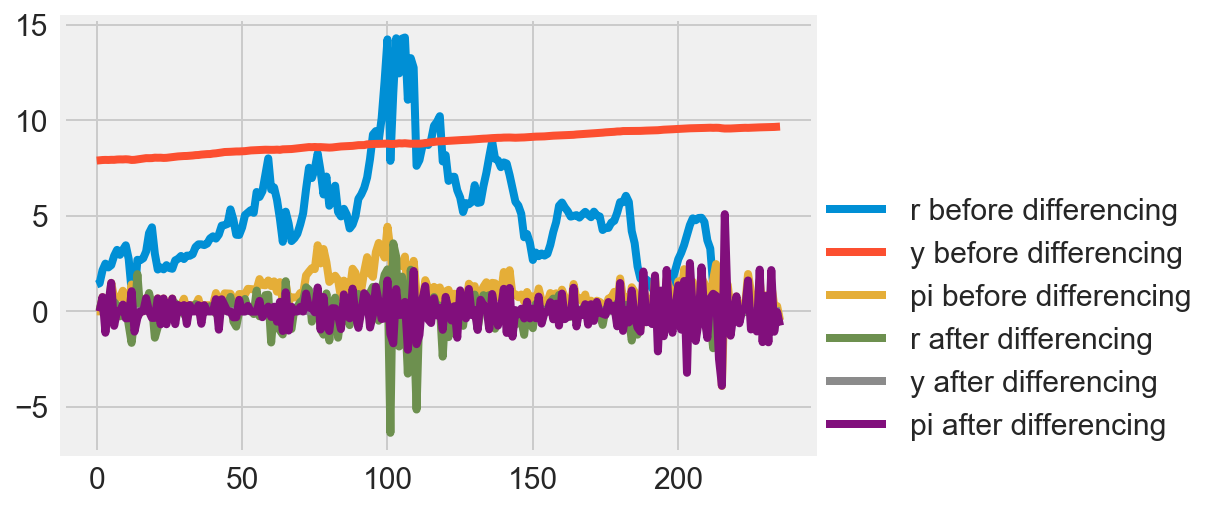

In [6]:
list_labels = [df.columns[i]+' before differencing' for i in range(len(df.columns))]
list_labels.extend([df.columns[i]+' after differencing' for i in range(len(df.columns))])

plt.plot(df,label='before differencing')
plt.plot(df_1,label='after differencing')
plt.legend(list_labels,loc=[1,0])
plt.show()
plt.show()

#### Look at the values of the cross correlation matrix at every lag for each pair of variables.

In [7]:
from itertools import combinations

In [8]:
[i for i in combinations((df.columns),2)]

[('r', 'y'), ('r', 'pi'), ('y', 'pi')]

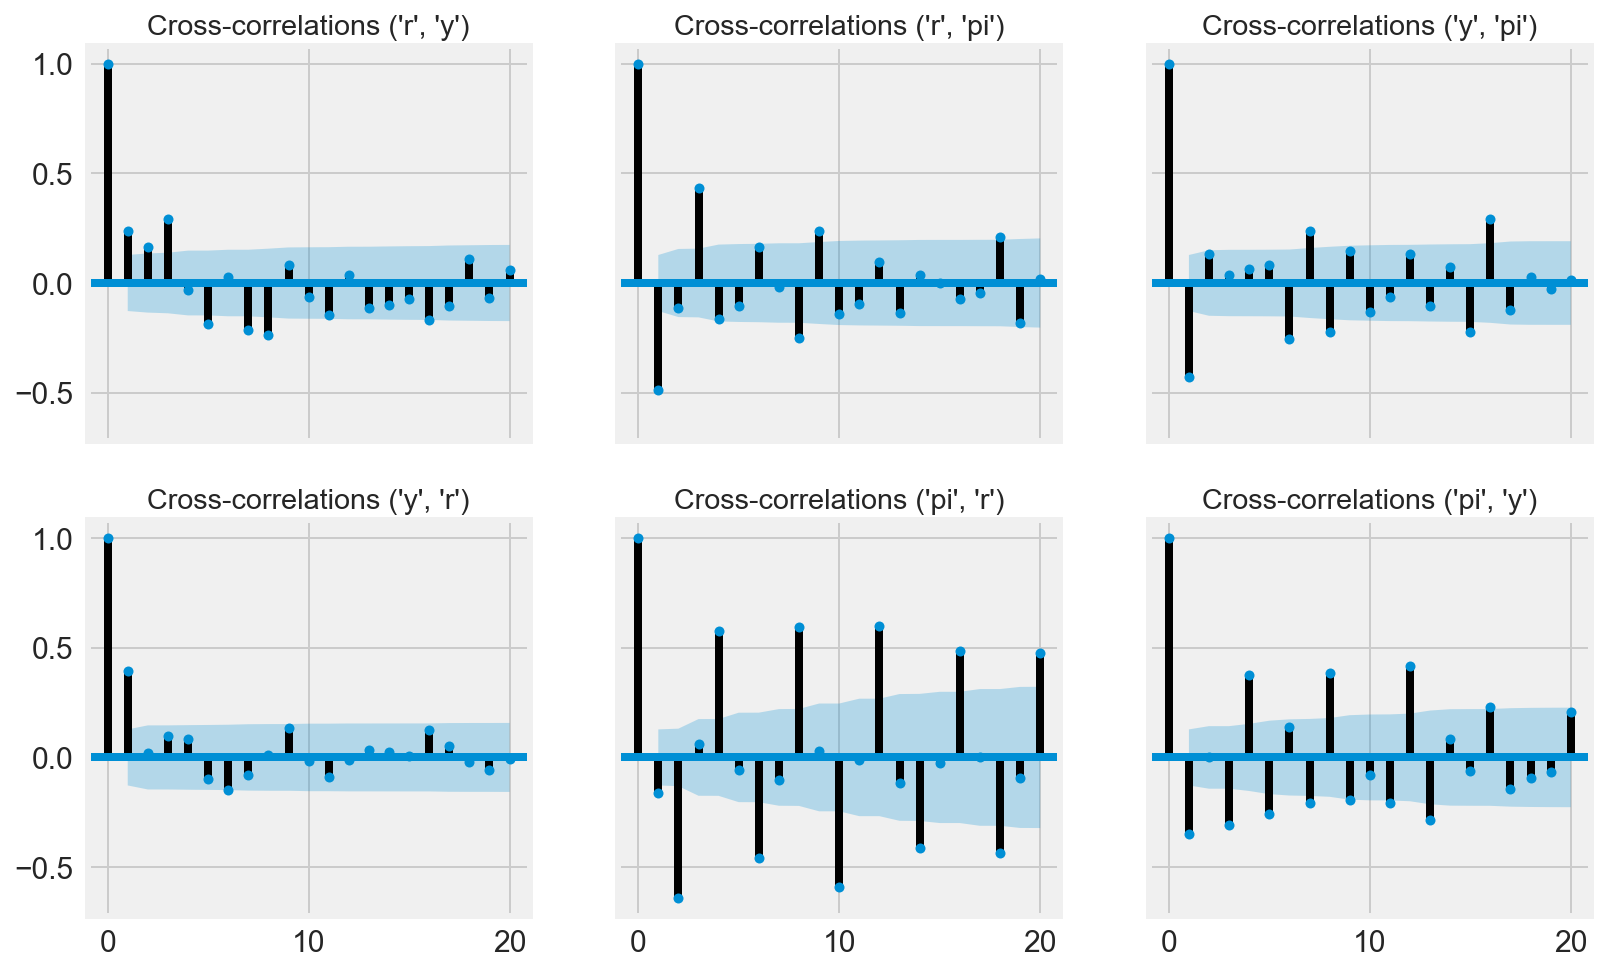

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=len(df.columns),figsize=(12,8),sharex=True,sharey=True)
for i, cols in enumerate(combinations(df.columns,2)):
    plot_acf(ccf(df_1[cols[0]],df_1[cols[1]]),lags=20,ax=ax[0,i],title='Cross-correlations {}'.format(cols))
    plot_acf(ccf(df_1[cols[1]],df_1[cols[0]]),lags=20,ax=ax[1,i],title='Cross-correlations {}'.format(cols[-1::-1]))
plt.show()

#### Fit different VARMA models. 

In [10]:
model = sm.tsa.VARMAX(df_1.values[1:], order=(1,1),trend='nc')
results = model.fit(maxiter=5000, method='powell', disp=False)
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


Dep. Variable:,"['y1', 'y2', 'y3']",No. Observations:,234
Model:,"VARMA(1,1)",Log Likelihood,241.572
Date:,"Thu, 23 Aug 2018",AIC,-435.144
Time:,15:37:21,BIC,-352.216
Sample:,0,HQIC,-401.707
,- 234,,
Covariance Type:,opg,,
Ljung-Box (Q):,"82.79, 37.98, 213.22",Jarque-Bera (JB):,"1111.56, 13.21, 558.33"
Prob(Q):,"0.00, 0.56, 0.00",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.74, 0.40, 3.91",Skew:,"-1.52, 0.22, -1.07"
Prob(H) (two-sided):,"0.19, 0.00, 0.00",Kurtosis:,"13.23, 4.08, 10.26"


#### Extract the AR and MA coefficient matrices.

In [11]:
print(results.coefficient_matrices_var)

[[[-4.83599980e-02  1.23641978e+01 -1.43068022e-01]
  [ 1.03271096e-02  7.33125856e-01  4.33058172e-03]
  [ 7.21181736e-01 -5.83499430e+00  1.88912058e-01]]]


In [12]:
print(results.coefficient_matrices_vma)

[[[-0.2189781  -0.98964073  0.23876781]
  [-0.01048681 -0.37998441 -0.00423404]
  [-0.4798647   0.7374235  -1.00393237]]]


#### Search for the best AR model according to AIC and BIC.

In [13]:
for i in range(1,6):
    model = sm.tsa.VARMAX(df_1.values, order=(i,0))
    results = model.fit(maxiter=2000, disp=False)
    print(i, results.aic, results.bic)

1 -377.5904693925732 -315.31793013797835
2 -420.8834812461995 -327.4746723643072
3 -506.28905978758974 -381.74398127840004


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 -496.2636489891504 -340.58230085266325
5 -490.7967003905503 -303.9790826267657


In [14]:
model = sm.tsa.VARMAX(df_1.values, order=(3,0))
results = model.fit(maxiter=1000, disp=False)

In [15]:
results.summary()

Dep. Variable:,"['y1', 'y2', 'y3']",No. Observations:,235
Model:,VAR(3),Log Likelihood,289.145
,+ intercept,AIC,-506.289
Date:,"Thu, 23 Aug 2018",BIC,-381.744
Time:,15:37:42,HQIC,-456.078
Sample:,0,,
,- 235,,
Covariance Type:,opg,,
Ljung-Box (Q):,"51.02, 21.72, 72.80",Jarque-Bera (JB):,"956.13, 25.67, 446.56"
Prob(Q):,"0.11, 0.99, 0.00",Prob(JB):,"0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.69, 0.32, 3.69",Skew:,"-1.29, 0.14, -0.89"


In [16]:
coeffs_ar = results.coefficient_matrices_var
print(coeffs_ar)

[[[-1.45115311e-01  1.60237860e+01 -9.98193754e-02]
  [ 5.23131001e-04  2.91924032e-01  9.52104585e-04]
  [ 1.85428932e-01  4.88493216e+00 -8.16324813e-01]]

 [[-2.26979372e-01  1.28740803e+01  3.21377058e-02]
  [-1.98535149e-03  1.79797713e-01  3.83390967e-04]
  [ 2.09558085e-03 -2.21381113e+00 -6.97105115e-01]]

 [[ 2.25239847e-01 -2.59663803e+00  2.86243519e-02]
  [-7.77972192e-04 -1.64497543e-02  4.13190425e-04]
  [ 1.56398088e-01  1.28844740e+01 -5.27916333e-01]]]


#### Let's look at one particular model.

In [17]:
model = sm.tsa.VARMAX(df_1[1:].values, order=(3,0))
results = model.fit(maxiter=1000, disp=True)

#### We can plot the residuals and obtain forecasts similar to the univariate case.

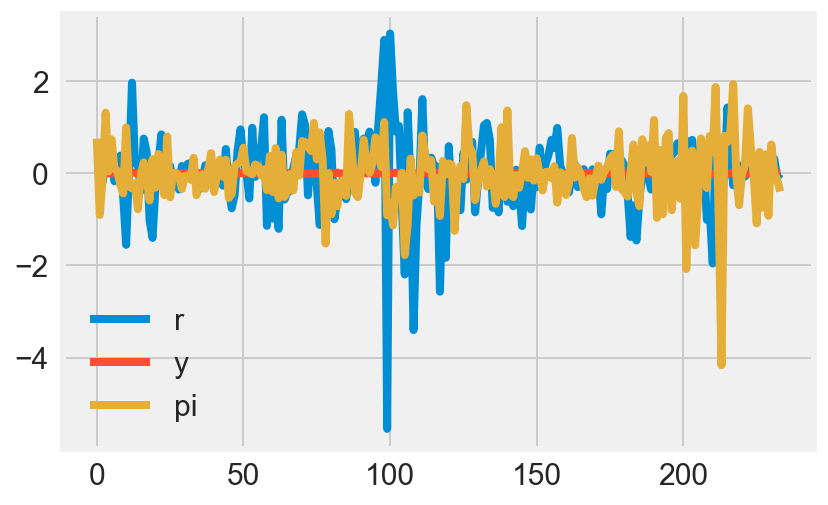

In [18]:
plt.plot(results.resid)
plt.legend([col for col in df.columns])
plt.show()

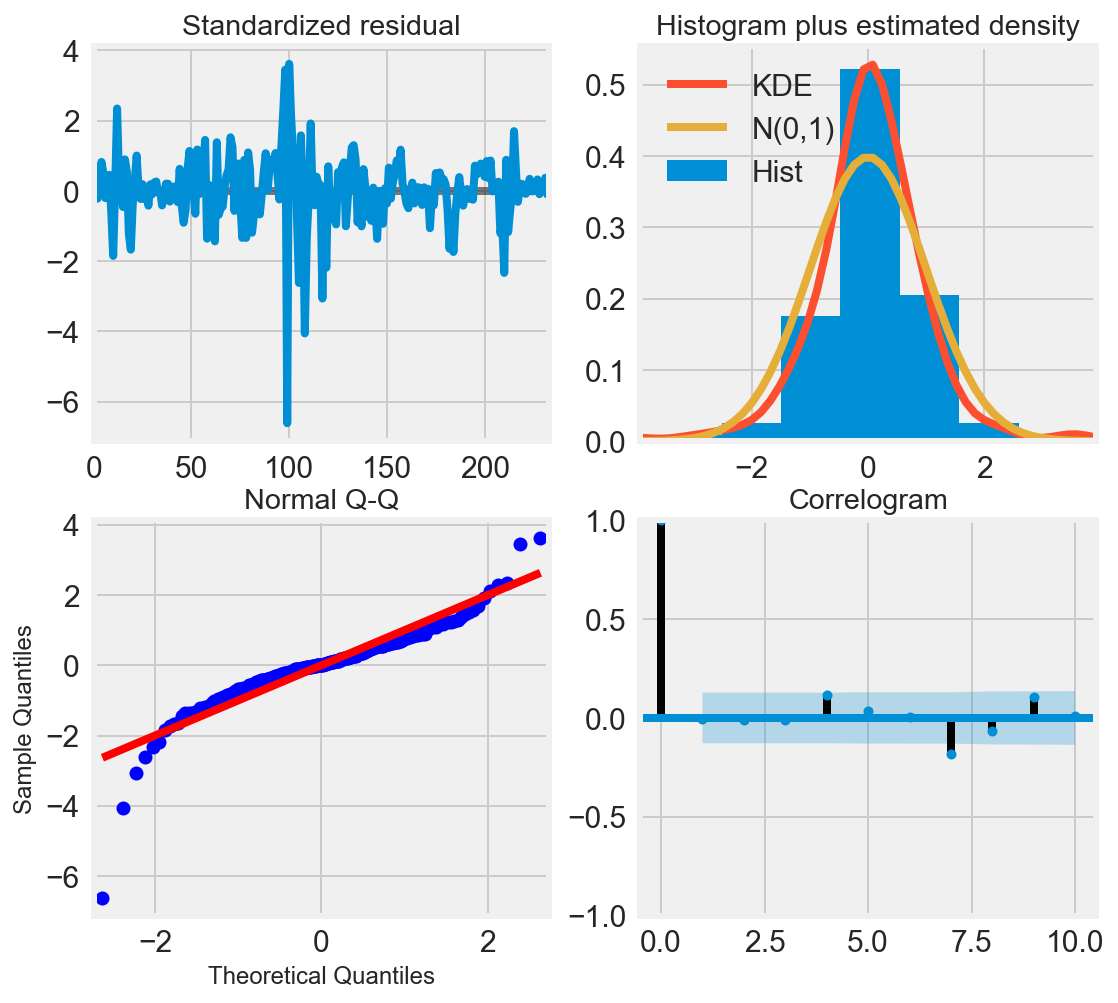

In [19]:
results.plot_diagnostics(0,figsize=(8,8))
plt.show()

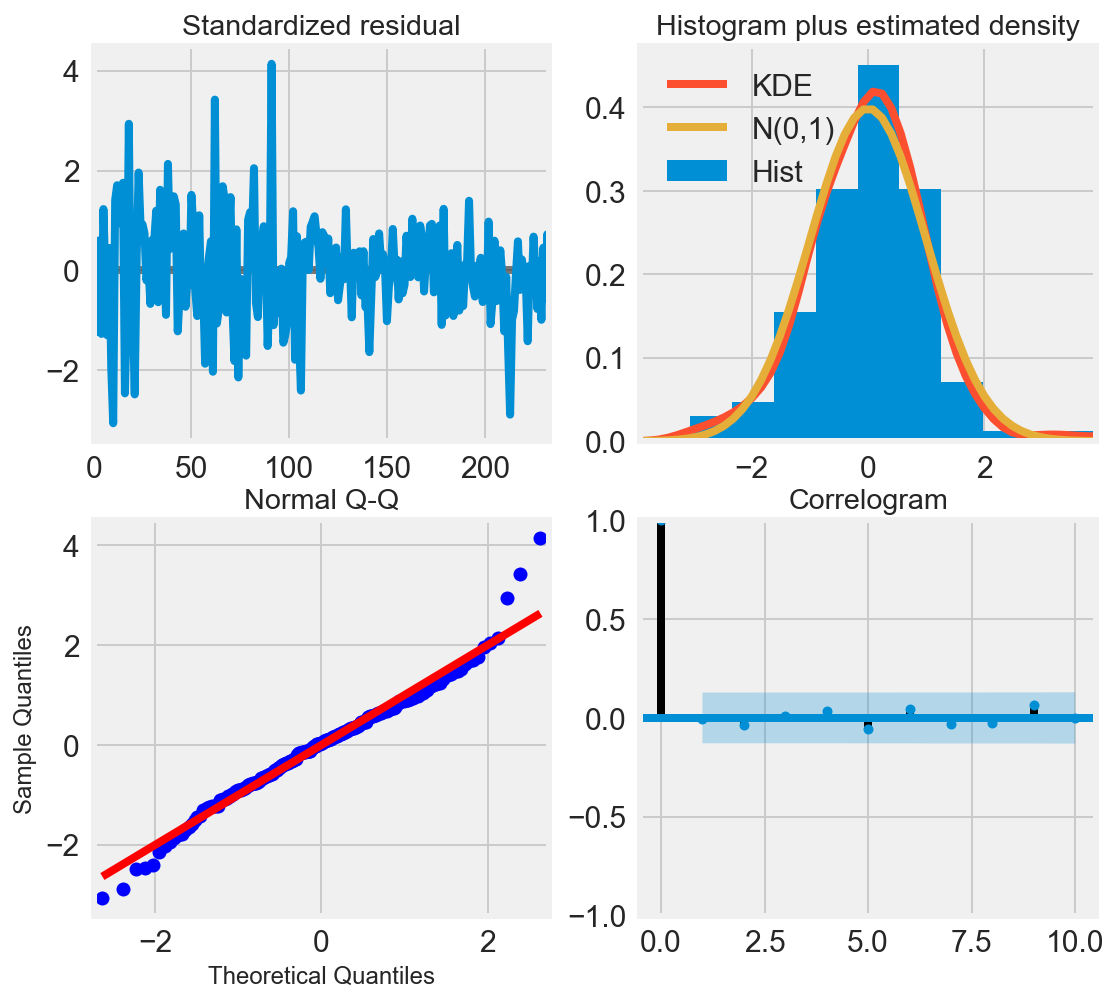

In [20]:
results.plot_diagnostics(1,figsize=(8,8))
plt.show()

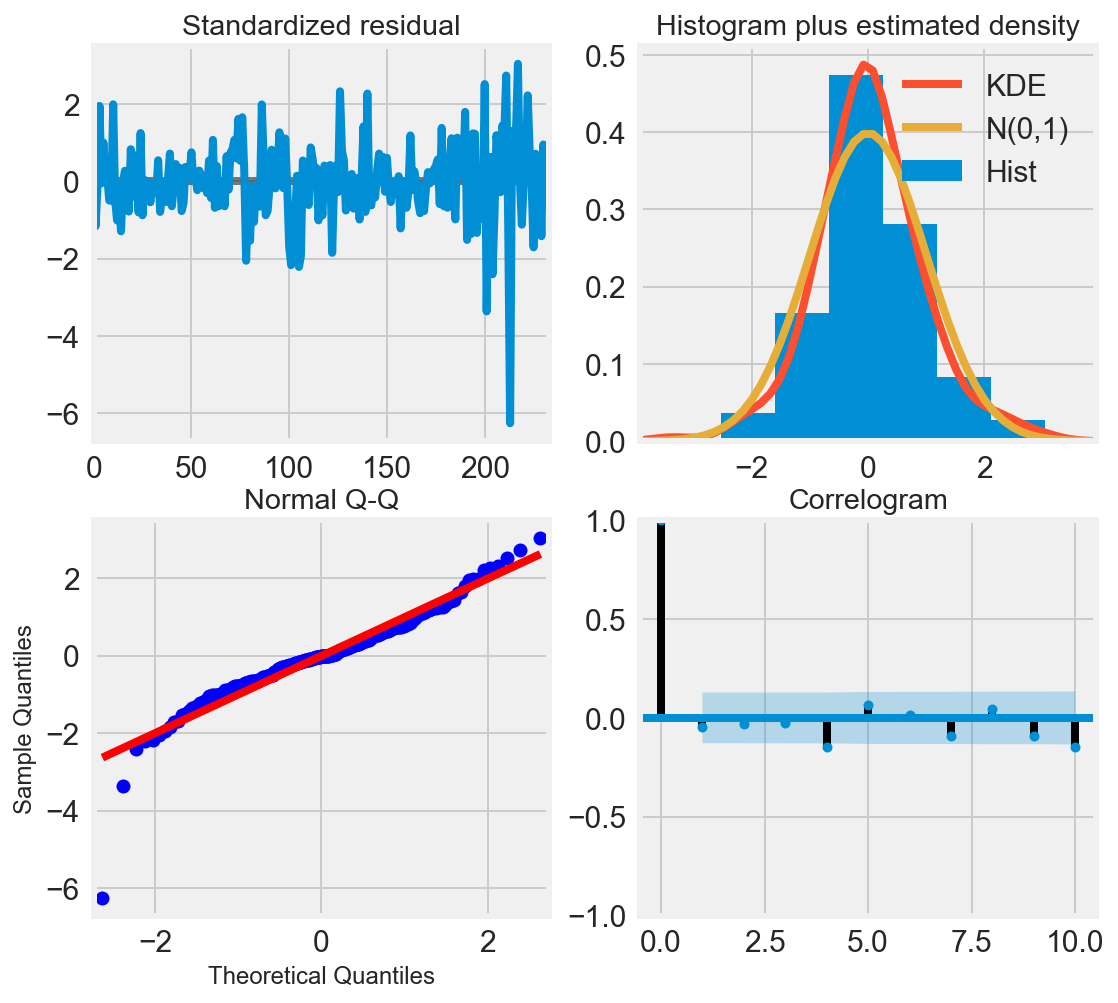

In [21]:
results.plot_diagnostics(2,figsize=(8,8))
plt.show()

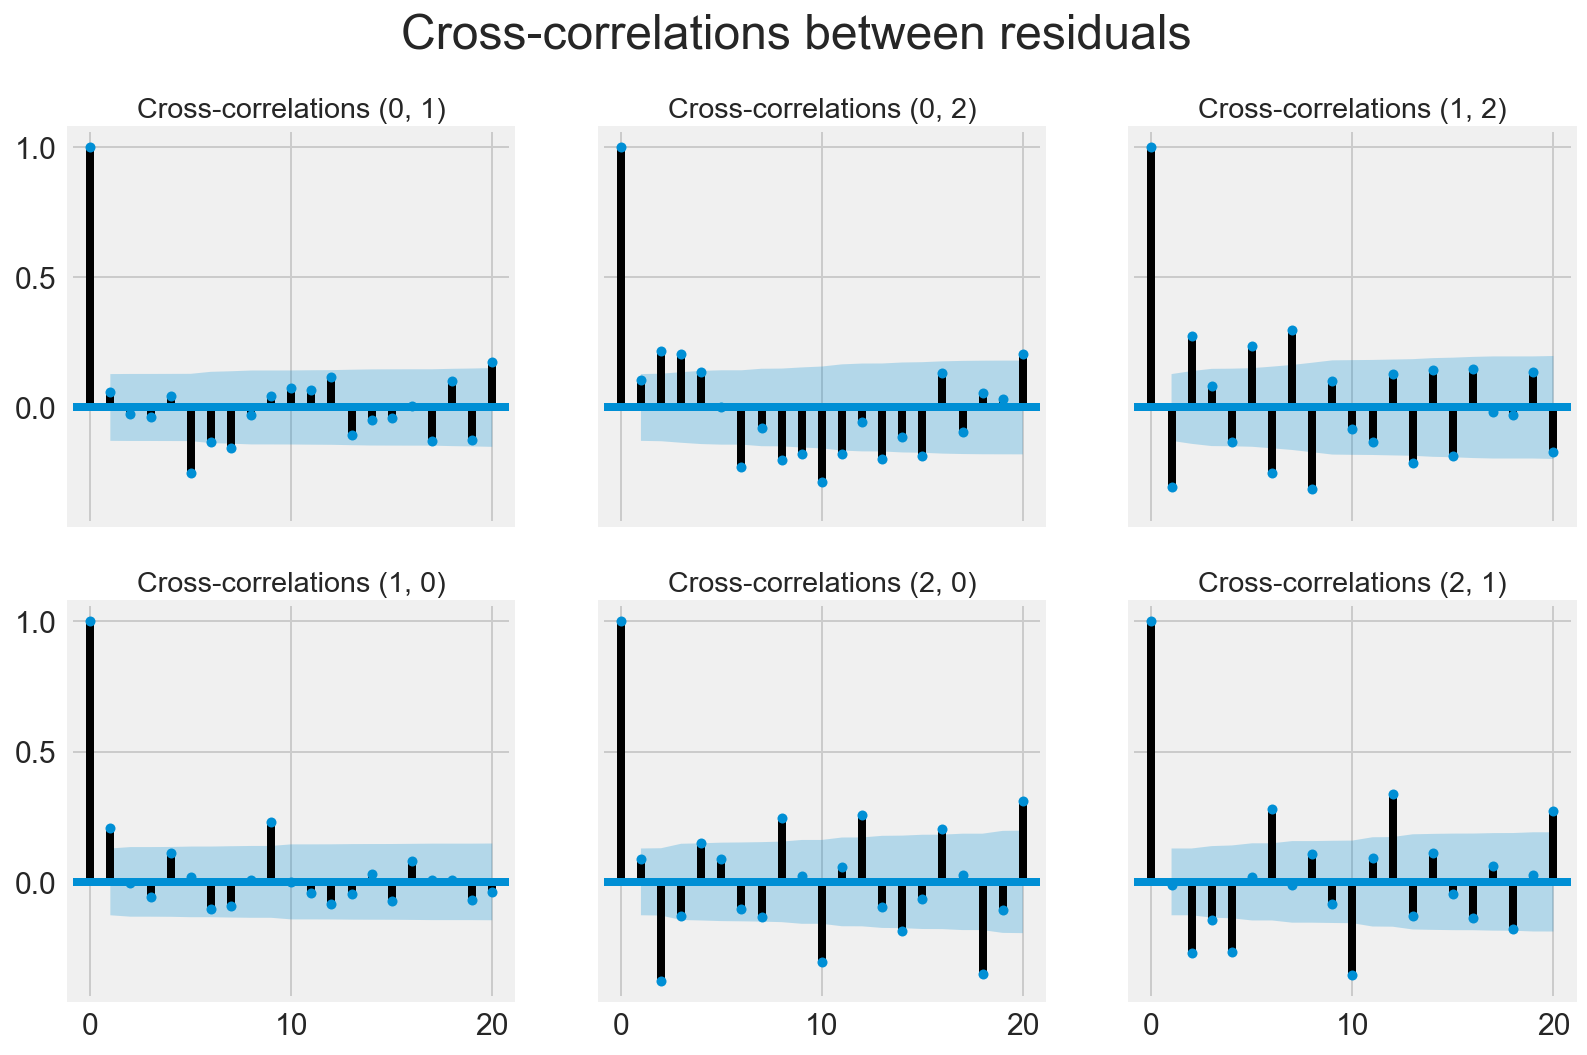

In [22]:
fig, ax = plt.subplots(nrows=2,ncols=len(df.columns),figsize=(12,8),sharex=True,sharey=True)
for i, cols in enumerate(combinations(list(range(3)),2)):
    cols
    plot_acf(ccf(results.resid[:,cols[0]],results.resid[:,cols[1]]),lags=20,ax=ax[0,i],title='Cross-correlations {}'.format(cols))
    plot_acf(ccf(results.resid[:,cols[1]],results.resid[:,cols[0]]),lags=20,ax=ax[1,i],title='Cross-correlations {}'.format(cols[-1::-1]))
plt.suptitle('Cross-correlations between residuals',fontsize=24)
plt.show()

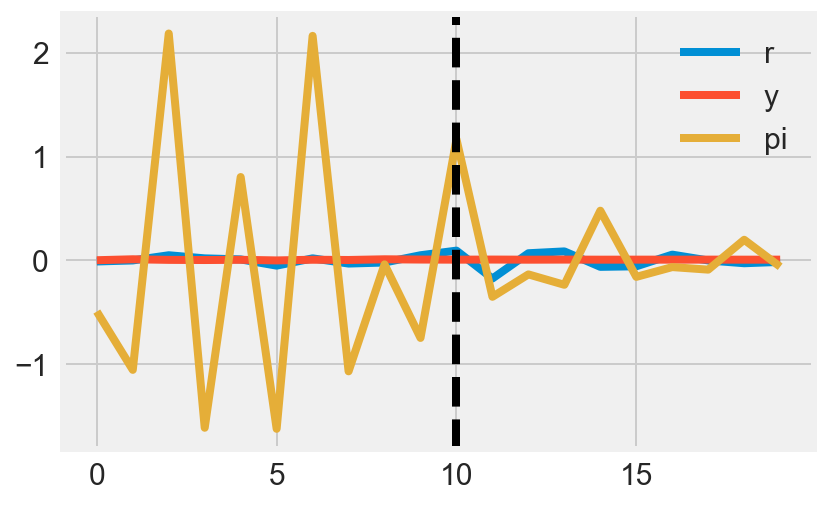

In [23]:
plt.plot(np.concatenate((df_1[-10:],results.forecast(10)),axis=0))
plt.axvline(len(df_1[-10:]),color='k',ls='--')
plt.legend([col for col in df.columns])
plt.show()

R2 values:

In [24]:
1-np.sqrt((np.square(results.resid)).mean(axis=0))/df_1.std().values

array([0.09693817, 0.09455002, 0.31658951])

## Resources
---

- [Statsmodels documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.varmax.VARMAX.html)
- [Statsmodels example](http://www.statsmodels.org/dev/examples/notebooks/generated/statespace_varmax.html)

> The book where these examples are from:

> *David Ruppert and David Matteson: Statistics and Data Analysis for financial engineering, Springer 2015.*
